In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os

In [44]:
sns.set()

In [69]:
poi_x, poi_y = (2,5)
close_dist = 1.5
far_dist = 6
data_dir = 'data/exp1'

In [70]:
csv_files = [f for f in os.listdir(data_dir) if f.endswith(".csv")]

In [71]:
dfs = [
    pd.read_csv(os.path.join(data_dir, csv), parse_dates=['time']).assign(dataset_index=i + 1)
    for i, csv in enumerate(csv_files)
]

In [128]:
def calc(df):
    df['poi_dist_calc'] = ((df['x']-poi_x)**2 + (df['y']-poi_y)**2)**0.5
    df['poi_dist_calc_avg'] = df['poi_dist_calc'].rolling(window=10, center=True).mean()
    
    step_times = [
        df[df['xp_step'] == s]['time'].iloc[0]
        for s
        in range(0, max(df['xp_step']+1))
    ]

    plt.figure(figsize=(15, 5))
    plt.plot(df['time'], df['poi_dist_calc'], '.', label='Raw distances')
    plt.plot(df['time'], df['poi_dist_calc_avg'], 'orange', alpha=0.75, label='10-point average')
    plt.axhline(y=3, color='green', linestyle='-', label='In threshold (3m)')
    plt.axhline(y=5, color='red', linestyle='-', label='Out threshold (5m)')
    
    for i, st in enumerate(step_times):
        plt.axvline(x=st, linestyle='-', label='Step time' if i == 0 else None)
    
    plt.plot([step_times[0], step_times[1]], [far_dist, far_dist], 'black', ls='--', label='Theorical distance')
    plt.plot([step_times[1], step_times[2]], [far_dist, close_dist], 'black', ls='--')
    plt.plot([step_times[2], step_times[3]], [close_dist, close_dist], 'black', ls='--')
    plt.plot([step_times[3], step_times[3] + pd.Timedelta(seconds=8)], [close_dist, far_dist], 'black', ls='--') 
    
    plt.ylim(bottom=0)
    plt.legend()
    plt.title('POI Distance - ' + df.iloc[0]['xp_name'])

[None, None, None]

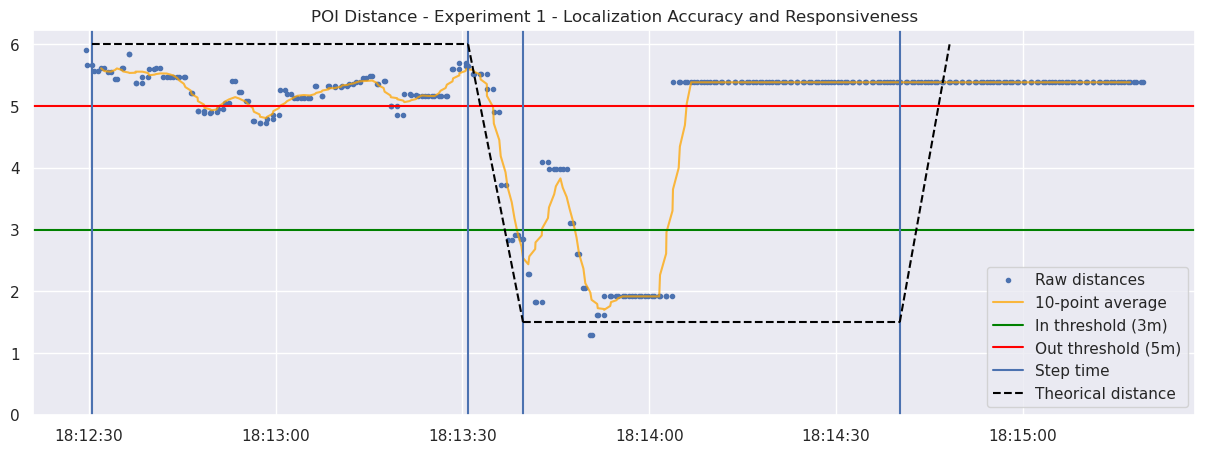

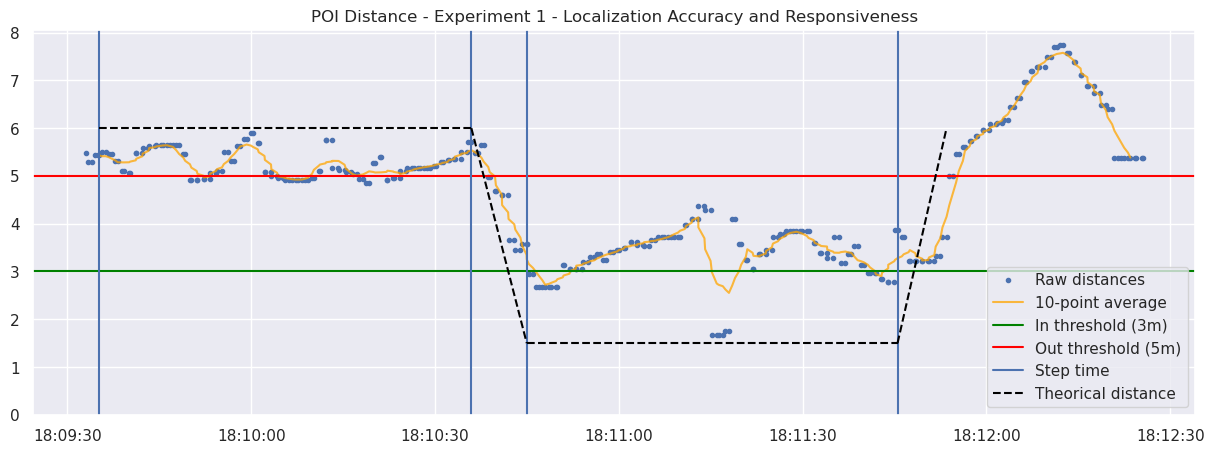

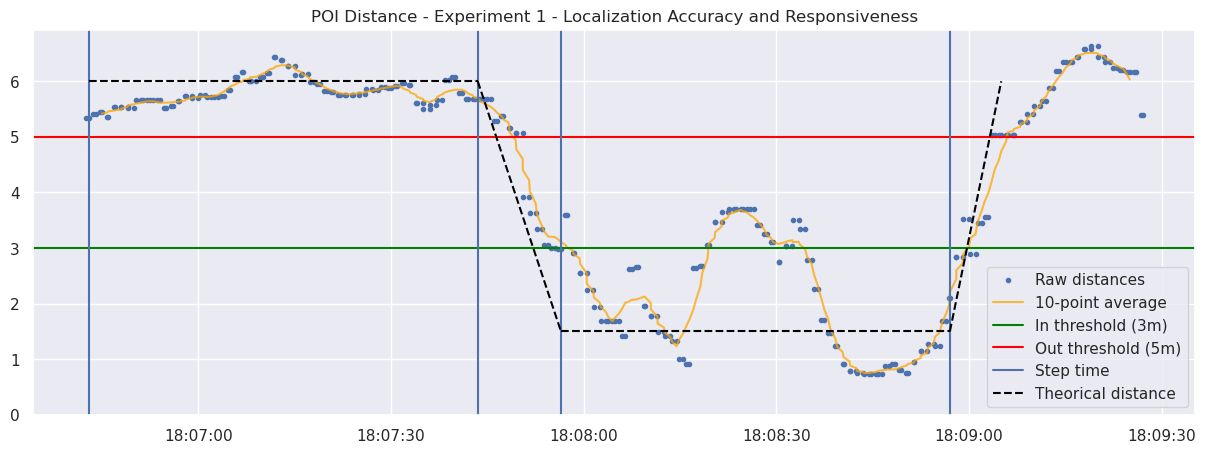

In [129]:
[calc(df) for df in dfs]

In [130]:
mdf = pd.concat(dfs, ignore_index=True)

In [131]:
fmdf = mdf[(mdf['x'] != 0) & (mdf['y'] != 0)]

In [132]:
positions = [(8, 5), (3.5, 5)]

(8, 5)
(3.5, 5)


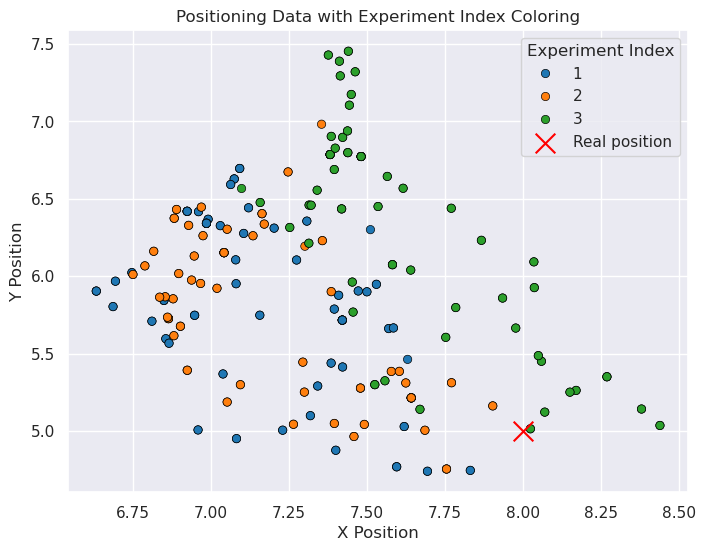

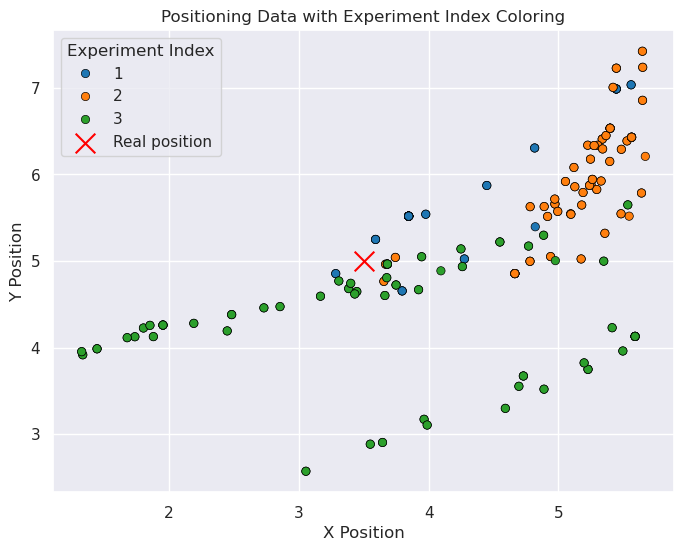

In [133]:
for i in [0, 2]:
    mdfs = fmdf[fmdf['xp_step'] == i]
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(
        data=mdfs, 
        x='x', 
        y='y', 
        hue='dataset_index',
        palette='tab10',
        edgecolor='black'
    )
    
    # Customize plot
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title("Positioning Data with Experiment Index Coloring")

    p = positions[i//2]
    print(p)
    plt.scatter(p[0], p[1], color='red', marker='x', s=200, label='Real position')
    plt.grid(True)
    plt.legend(title="Experiment Index")

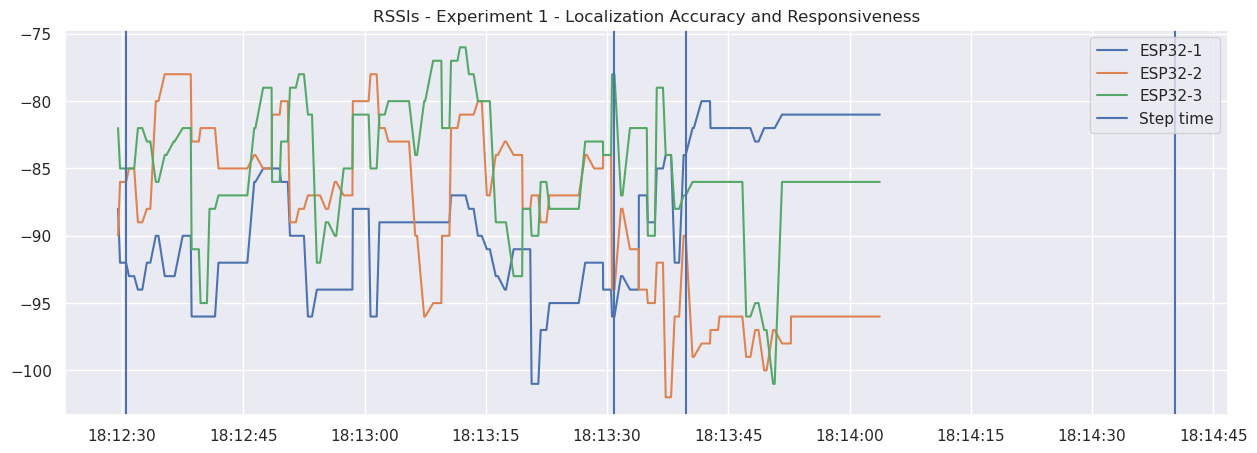

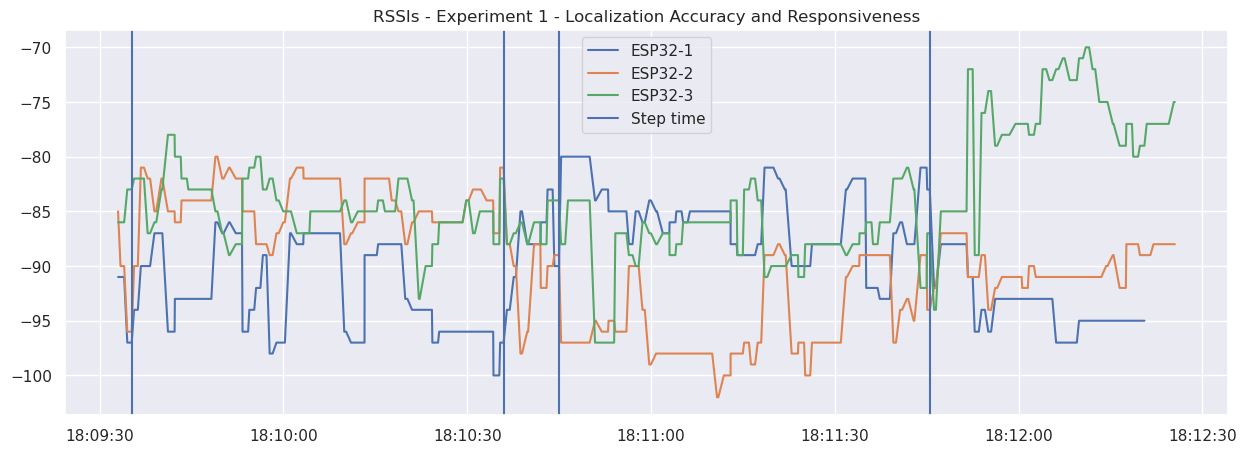

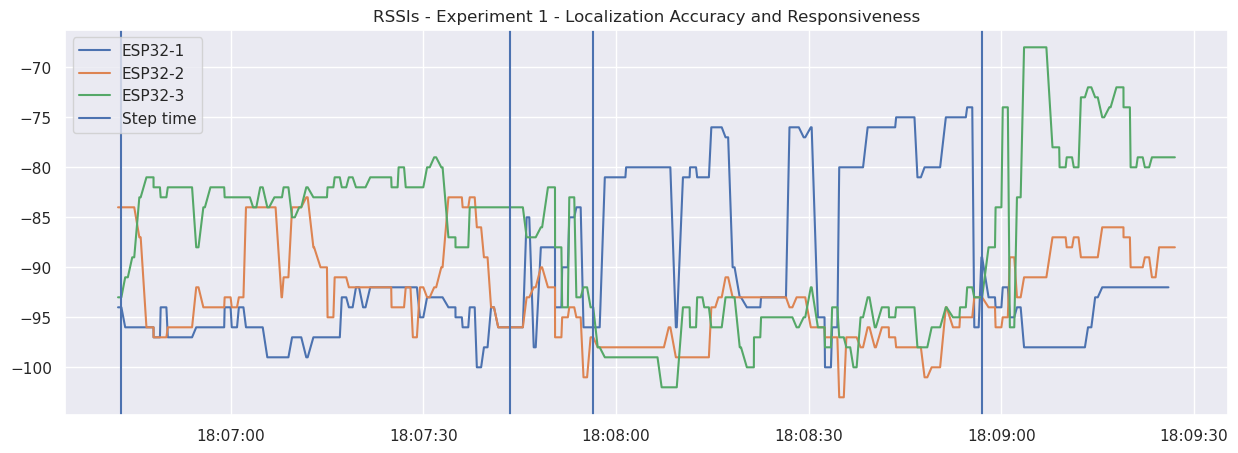

In [136]:
for df in dfs:
    df['poi_dist_calc'] = ((df['x']-poi_x)**2 + (df['y']-poi_y)**2)**0.5
    df['poi_dist_calc_avg'] = df['poi_dist_calc'].rolling(window=10, center=True).mean()
    
    step_times = [
        df[df['xp_step'] == s]['time'].iloc[0]
        for s
        in range(0, max(df['xp_step']+1))
    ]

    plt.figure(figsize=(15, 5))
    plt.plot(df['time'], df['ESP32-1_rssi'], label='ESP32-1')
    plt.plot(df['time'], df['ESP32-2_rssi'], label='ESP32-2')
    plt.plot(df['time'], df['ESP32-3_rssi'], label='ESP32-3')
    
    for i, st in enumerate(step_times):
        plt.axvline(x=st, linestyle='-', label='Step time' if i == 0 else None)
    
    plt.legend()
    plt.title('RSSIs - ' + df.iloc[0]['xp_name'])

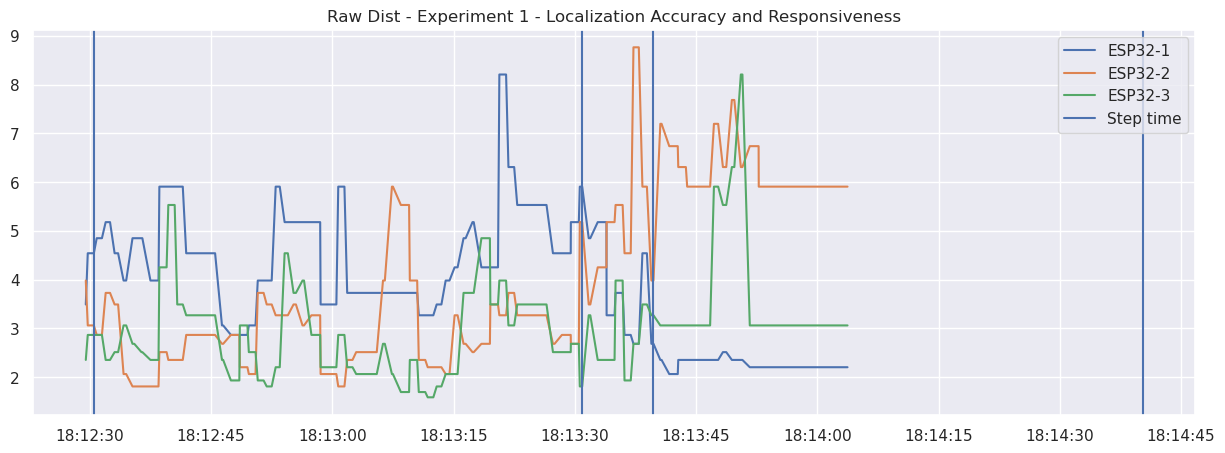

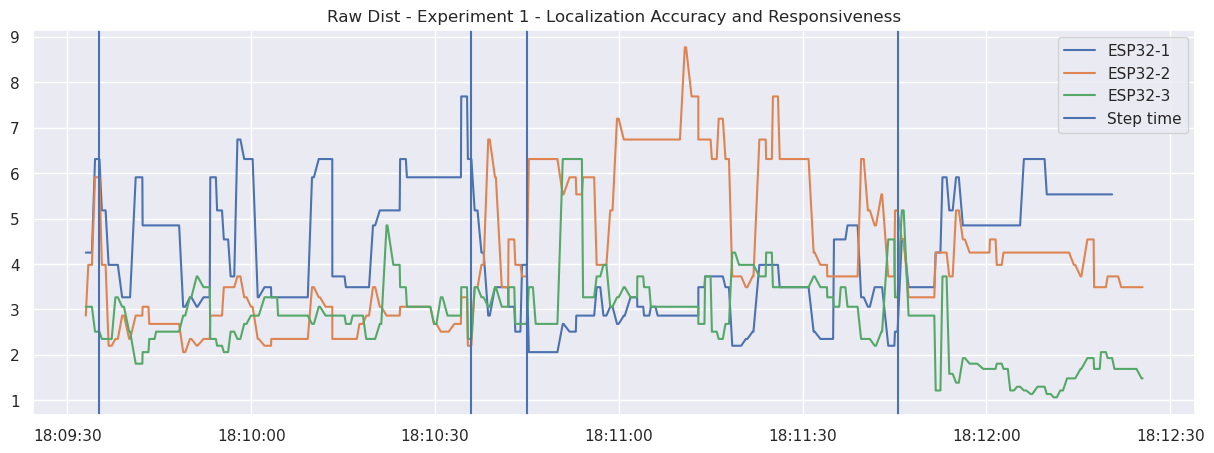

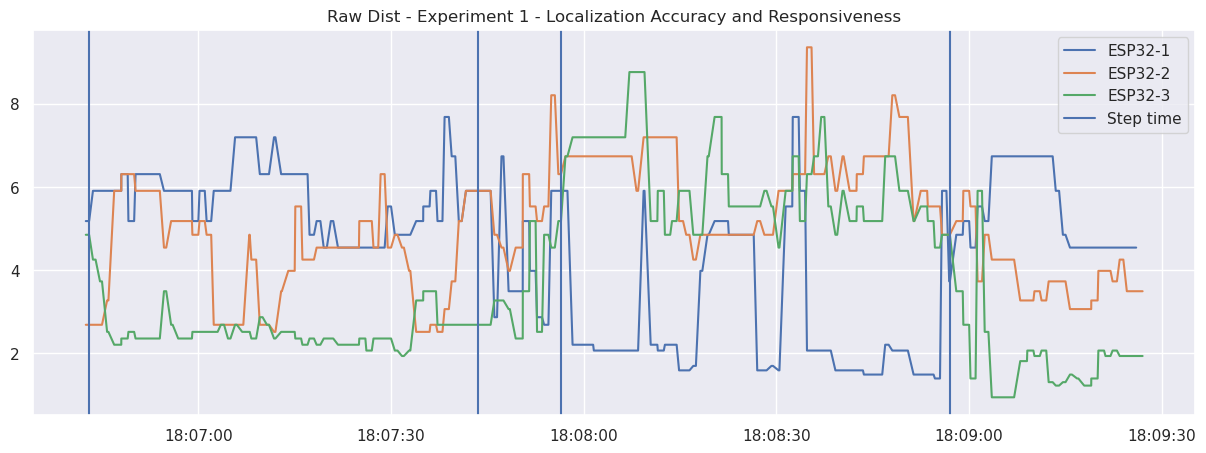

In [138]:
for df in dfs:
    df['poi_dist_calc'] = ((df['x']-poi_x)**2 + (df['y']-poi_y)**2)**0.5
    df['poi_dist_calc_avg'] = df['poi_dist_calc'].rolling(window=10, center=True).mean()
    
    step_times = [
        df[df['xp_step'] == s]['time'].iloc[0]
        for s
        in range(0, max(df['xp_step']+1))
    ]

    plt.figure(figsize=(15, 5))
    plt.plot(df['time'], df['ESP32-1_raw_dist'], label='ESP32-1')
    plt.plot(df['time'], df['ESP32-2_raw_dist'], label='ESP32-2')
    plt.plot(df['time'], df['ESP32-3_raw_dist'], label='ESP32-3')
    
    for i, st in enumerate(step_times):
        plt.axvline(x=st, linestyle='-', label='Step time' if i == 0 else None)
    
    plt.legend()
    plt.title('Raw Dist - ' + df.iloc[0]['xp_name'])

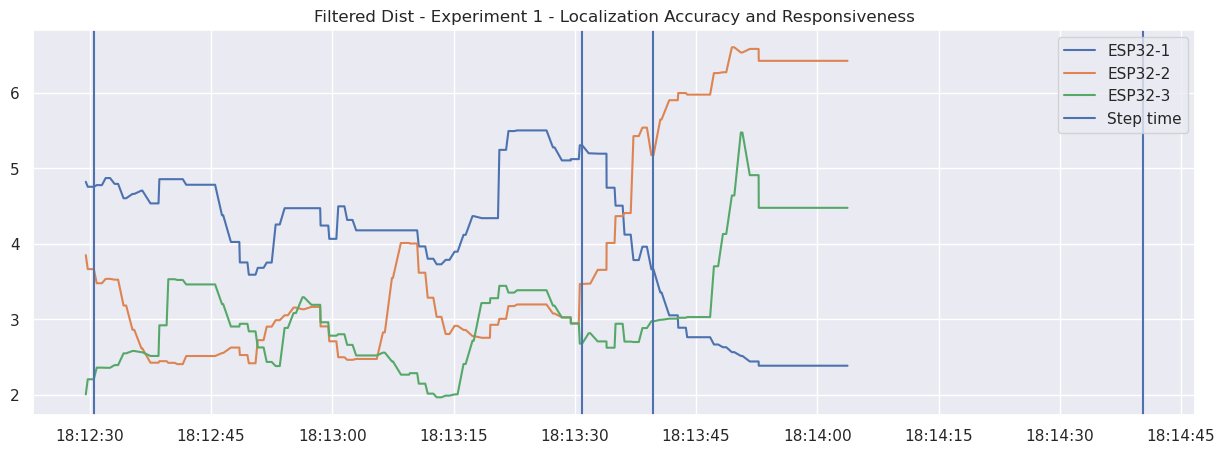

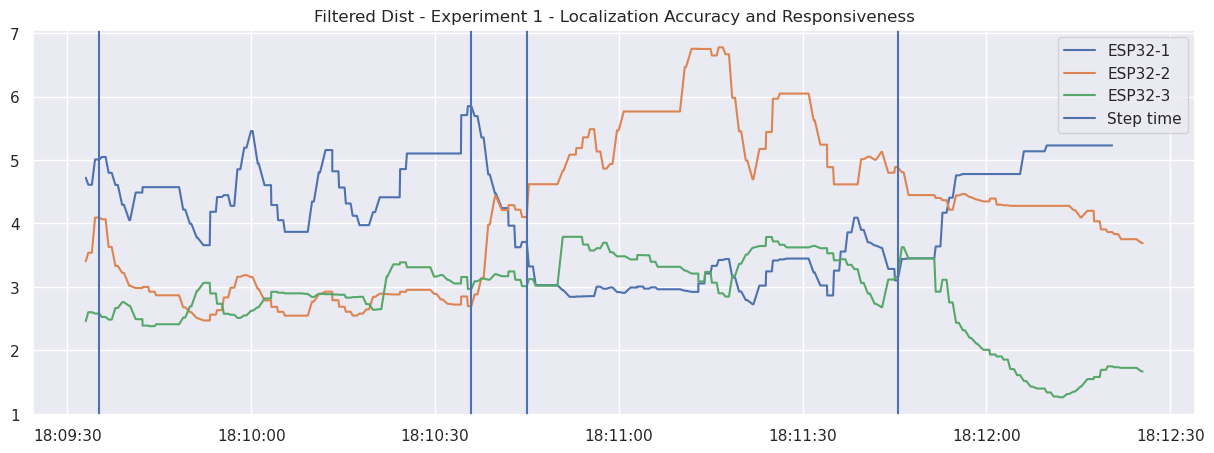

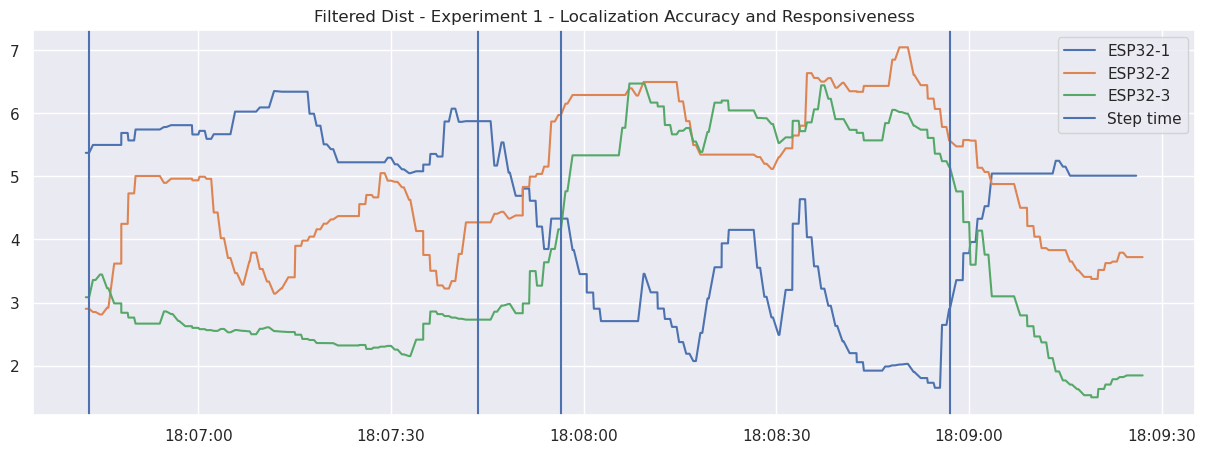

In [139]:
for df in dfs:
    df['poi_dist_calc'] = ((df['x']-poi_x)**2 + (df['y']-poi_y)**2)**0.5
    df['poi_dist_calc_avg'] = df['poi_dist_calc'].rolling(window=10, center=True).mean()
    
    step_times = [
        df[df['xp_step'] == s]['time'].iloc[0]
        for s
        in range(0, max(df['xp_step']+1))
    ]

    plt.figure(figsize=(15, 5))
    plt.plot(df['time'], df['ESP32-1_filtered_dist'], label='ESP32-1')
    plt.plot(df['time'], df['ESP32-2_filtered_dist'], label='ESP32-2')
    plt.plot(df['time'], df['ESP32-3_filtered_dist'], label='ESP32-3')
    
    for i, st in enumerate(step_times):
        plt.axvline(x=st, linestyle='-', label='Step time' if i == 0 else None)
    
    plt.legend()
    plt.title('Filtered Dist - ' + df.iloc[0]['xp_name'])